## Pseudo Random Number Generator

Let us learn about how to generate a random number.

In [6]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import math
import random

#### 1) Linear Congruent
The most classic and simple PRNG is the Linear Congruential Generator (LCG). An LCG generates the next number in the sequence ($X_{n+1}$) using the previous number ($X_n$) with this linear equation:

$$X_{n+1} = (a \cdot X_n + c) \pmod m$$

- $X_0$ is the Seed
- $a$ is the Multiplier
- $c$ is the Increment
- $m$ is the Modulus
- $X_{n+1}$ is the next "random" integer.

In [3]:
class SimpleLCG:
    """
    A simple LCG implementation to show the math.
    NOTE: These parameters are BAD and just for demonstration.
    """
    def __init__(self, seed, a, c, m):
        self.state = seed  # X_n (starts at X_0)
        self.a = a
        self.c = c
        self.m = m

    def next_int(self):
        """Generate X_{n+1}"""
        # X_{n+1} = (a * X_n + c) % m
        self.state = (self.a * self.state + self.c) % self.m
        return self.state
    
    def next_float(self):
        """Generate a random float in [0.0, 1.0)"""
        # Generate the next integer, then divide by m
        return self.next_int() / self.m

# Let's use "bad" parameters (very short period)
# m=10, a=3, c=1, seed=0
lcg_bad = SimpleLCG(seed=0, a=3, c=1, m=10)

print("Bad LCG (short period):")
for _ in range(15):
    # Result: 1, 4, 3, 0, 1, 4, 3, 0, ... (repeats every 4 numbers!)
    print(lcg_bad.next_int(), end=', ')
print("\n")

Bad LCG (short period):
1, 4, 3, 0, 1, 4, 3, 0, 1, 4, 3, 0, 1, 4, 3, 



In [3]:

# Let's use better parameters (from glibc)
# m = 2**31 - 1 (or 2147483647)
# a = 1103515245
# c = 12345
lcg_good = SimpleLCG(seed=42, a=1103515245, c=12345, m=2147483647)

print("Good LCG (long period):")
for _ in range(10):
    # Results look random and don't repeat quickly
    print(lcg_good.next_int(), end=', ')
print("\n")

Good LCG (long period):
1250496048, 1310387594, 1622543901, 519131292, 937264594, 926495101, 276623842, 371918760, 737924297, 673123932, 



In [5]:
print("Good LCG (float [0, 1)):")
lcg_good_float = SimpleLCG(seed=42, a=1103515245, c=12345, m=2147483647)
for _ in range(5):
    print(f"{lcg_good_float.next_float():.5f}", end=', ') # e.g. 0.00219, 0.70893, ...
print()

Good LCG (float [0, 1)):
0.58231, 0.61020, 0.75556, 0.24174, 0.43645, 


#### 2) Some available random number from numpy/python

`np.random.random()` 
- Returns a float in the range [0.0, 1.0) (inclusive of 0.0, exclusive of 1.0).
- Uniform Distribution (every value has an equal chance).

`np.random.randint(a,b)` 
- Returns an integer $N$ such that $a \le N \le b$ (inclusive of both $a$ and $b$).
- Uniform Distribution.

`np.random.randn()` 
- Return float from normal distribution with Mean $\mu = 0$ and a Standard Deviation $\sigma = 1$.

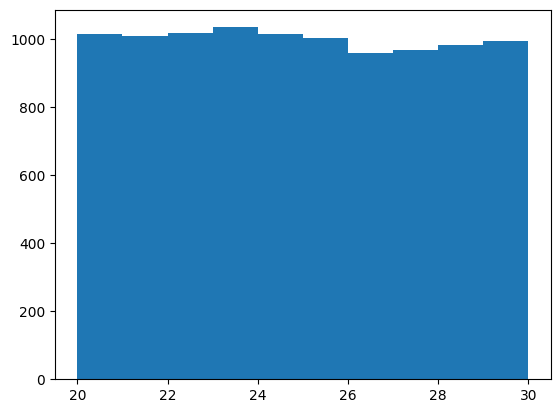

In [35]:
xs = [np.random.randint(20,30) for _ in range(10000)]
plt.hist(xs, bins=range(20,31), align='left', rwidth=0.8)
plt.show()

#### 3) Manipulating random number to get desired behavior.
- Random a float from 0 to 5.
- Random a float from -1 to 1.
- Random a float form normal distribution with mean 5 and std dev 1.
- Random a float form normal distribution with mean 20 and std dev 10.

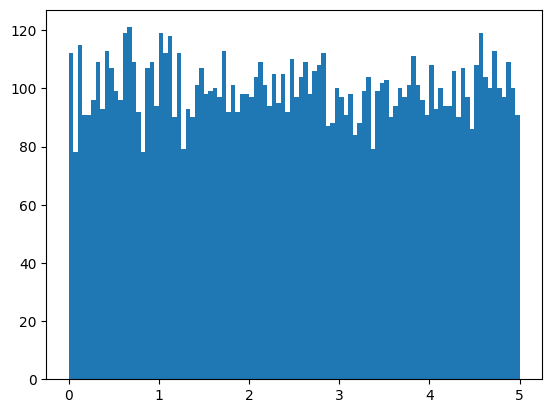

In [38]:
xs = [np.random.random()*5 for _ in range(10000)]
plt.hist(xs, bins=100)
plt.show()

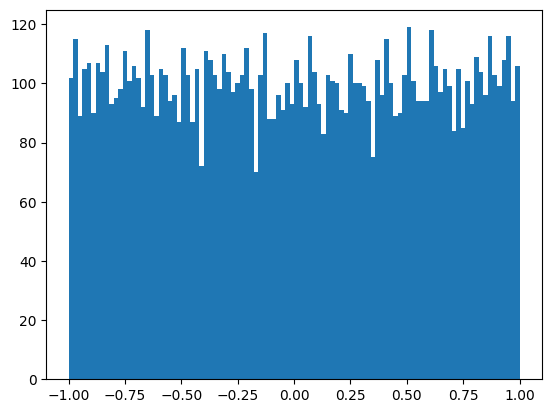

In [39]:
xs = [np.random.random()*2-1 for _ in range(10000)]
plt.hist(xs, bins=100)
plt.show()

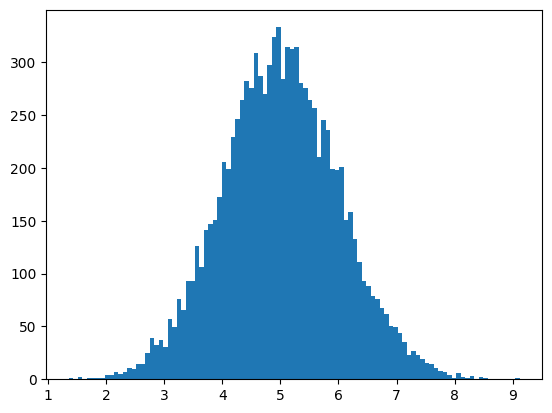

In [41]:
xs = [np.random.randn()+5 for _ in range(10000)]
plt.hist(xs, bins=100)
plt.show()

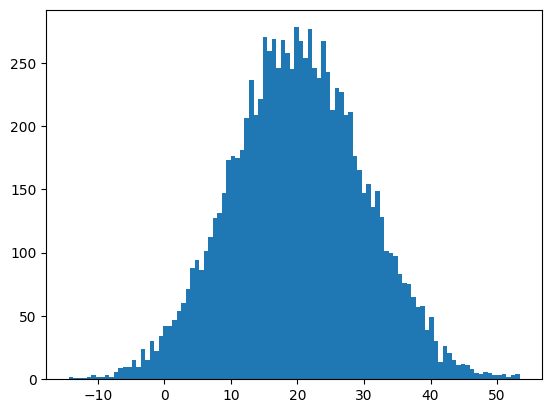

In [43]:
xs = [np.random.randn()*10+20 for _ in range(10000)]
plt.hist(xs, bins=100)
plt.show()

#### 4) Gacha Games!

The "Gacha Game" problem is a perfect example of "Discrete Probability" sampling. You are designing a gacha game with 3 rarities:

- R (Rare): 80%

- SR (Super Rare): 15%

- SSR (Super Super Rare): 5%

Algorithm : We use random.random(), which gives $U$ in $[0.0, 1.0)$, and "partition" this interval according to our probabilities.

In [13]:
def pull_gacha():
    U = random.random() # Get a random value in [0.0, 1.0)
    if U < 0.05:
        return "SSR"
    elif U < (0.05 + 0.15):
        return "SR"
    else:
        return "R"

# --- Test pull 10 times ---
print("\n--- Gacha 10 Pulls ---")
pulls = {}
for _ in range(10):
    item = pull_gacha()
    print(item, end=", ")
    pulls[item] = pulls.get(item, 0) + 1 # count them

print(f"\nSummary: {pulls}")

# --- Test pull 1,000,000 times (Monte Carlo!) ---
print("\n--- Gacha 1,000,000 Pulls (Monte Carlo Simulation) ---")
pulls_large = {"R": 0, "SR": 0, "SSR": 0}
N_pulls = 1000000
for _ in range(N_pulls):
    pulls_large[pull_gacha()] += 1

print(f"R: {pulls_large['R'] / N_pulls * 100:.2f}% (Expected 80%)")
print(f"SR: {pulls_large['SR'] / N_pulls * 100:.2f}% (Expected 15%)")
print(f"SSR: {pulls_large['SSR'] / N_pulls * 100:.2f}% (Expected 5%)")



--- Gacha 10 Pulls ---
R, R, R, R, R, R, R, SR, R, R, 
Summary: {'R': 9, 'SR': 1}

--- Gacha 1,000,000 Pulls (Monte Carlo Simulation) ---
R: 80.06% (Expected 80%)
SR: 14.95% (Expected 15%)
SSR: 5.00% (Expected 5%)


## Monte Carlo Simulations

### Loaded Die.

<table>
<tr style="text-align:center">
    <td>Number</td>
    <td>1</td>
    <td>2</td>
    <td>3</td>
    <td>4</td>
    <td>5</td>
    <td>6</td>
</tr>
<tr style="text-align:center">
    <td>Probability</td>
    <td>0.3</td>
    <td>0.2</td>
    <td>0.1</td>
    <td>0.2</td>
    <td>0.1</td>
    <td>0.1</td>
</tr>
</table>

#### 1) Simulating the dice.

Simulate the dice result such that it has the given probability distribution.

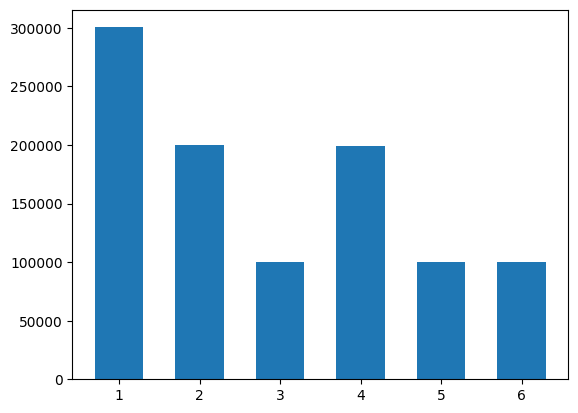

In [58]:
def toss_dice():
    x = random.random() # Get a random value in [0.0, 1.0)
    if x < 0.3:
        return 1
    elif x < 0.5:
        return 2
    elif x < 0.6:
        return 3
    elif x < 0.8:
        return 4
    elif x < 0.9:
        return 5
    else:
        return 6  

dices = [toss_dice() for _ in range(1000000)]
plt.hist(dices, bins=range(1,8), align='left', rwidth=0.6)
plt.show()


#### 2) Expected Value.

What is the expected value of dice result? Try both simulation and analytical formula.

In [61]:
print(np.mean(dices))

true_value = 1*0.3 + 2*0.2 + 3*0.1 + 4*0.2 + 5*0.1 + 6*0.1
print(f"True expected value: {true_value}")


2.898073
True expected value: 2.9


3) What is the expected value of $A+B$ where $A$ is the result of the first dice and $B$ is the result of the second dice? Use simulation and compare with analytic answer.

In [64]:
dices = [toss_dice() + toss_dice() for _ in range(100000)]
print(np.mean(dices))

5.797406


4) What is the expected value of $AB$?

8.39473


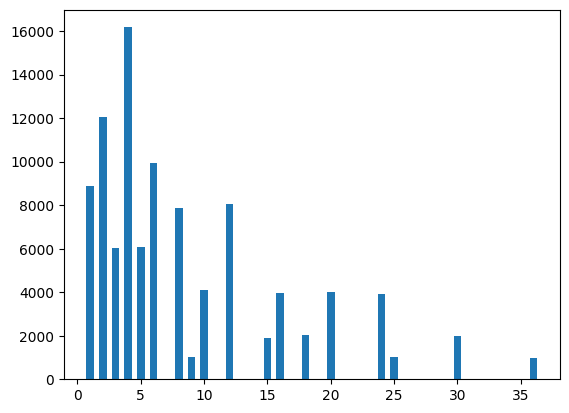

In [68]:
dices = [toss_dice() * toss_dice() for _ in range(100000)]
print(np.mean(dices))
plt.hist(dices, bins=range(1,38), align='left', rwidth=0.6)
plt.show()

5) Expected number of toss to see the first '6'

In [69]:
E = 0
N = 100000
for _ in range(N):
    toss = 1
    while True:
        if toss_dice() == 6:
            break
        toss += 1
    E += toss
print(f"Expected number of toss to see the first '6': {E / N}")

# how to calculate expected number of toss to see the first '6' analytically?

Expected number of toss to see the first '6': 9.98366


6) Now we play the games of two people. We take the product of the two dice. Whoever get more number wins. What is the probability of getting a draw.

In [70]:
dices = [toss_dice() == toss_dice() for _ in range(100000)]
np.sum(dices) / len(dices)

0.20007

7) A little bit harder: consider the game of product dice. If our first dice is 3, what is the probability of winning?

In [76]:
dices = [3*toss_dice() > toss_dice()*toss_dice() for _ in range(100000)]
np.sum(dices) / len(dices)


0.53503

### Geometric Brownian Motion.

One popular way to simulate stock is using geometric brownian motion. Stockprice at $t+dt$ is related to the stock price at time $t$ by

$$s(t+dt) = s(t) + s(t)(\mu dt + \epsilon\sigma \sqrt{dt}) $$

where
1. $\mu$ is the mean rate of return. Typically quote as $\%$ per year.
2. $\epsilon$ is a normally distributed random variable with mean 0 and variance of 1.
3. $\sigma$ is called volatility. It typically quoted as $\%$ per $\sqrt{\text{year}}$. It represent how wildly stock can go.

To use this formula, we need to make sure the unit for $t$ is correct. Normally just convert it to year

All these number can be looked up from the internet (you can calculate one yourself from historical data too). 

Here is one example: google for aapl volatility.

The funny unit of $\sqrt{t}$ has to do with scaling behavior. You can read it in the lecture notes.

1) Given the volatility($\sigma$) of $28\%$ per $\sqrt{\text{year}}$ and mean rate of return $8.77\%$. The stock today is 119.21$. Write a function to generate the price for tomorrow given the price today.

In [84]:
def price_next(s, dt, mu, sigma):
    return s + s * (mu * dt + sigma * math.sqrt(dt) * np.random.randn())


def gen_yearly(s, dt, mu, sigma, n):
    ret = []
    ret.append(s)
    for _ in range(n):  # Assume 252 trading days in a year
        s = price_next(s, dt, mu, sigma)
        ret.append(s)
    return np.array(ret)

price_next(119.21, 1/252, 0.0877, 0.28)


122.14702060250802

2) Generate the price for 1 trading year(all the time we said year it actually means trading year). Have dt = 1 day. 1 Trading year is actually 252 day.

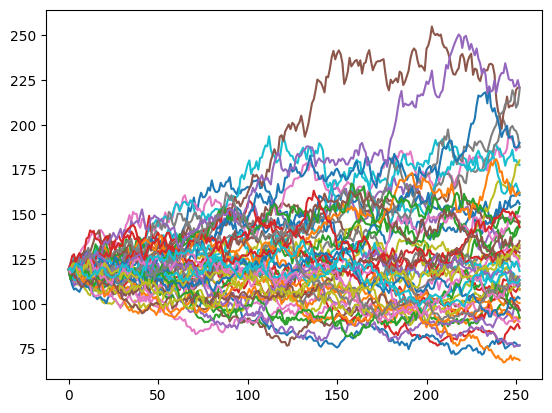

In [91]:
for i in range(50):
    stock_sim = gen_yearly(119.21, 1/252, 0.0877, 0.28, 252)
    plt.plot(stock_sim)

3) What is the expected value of the stock at the end of year?

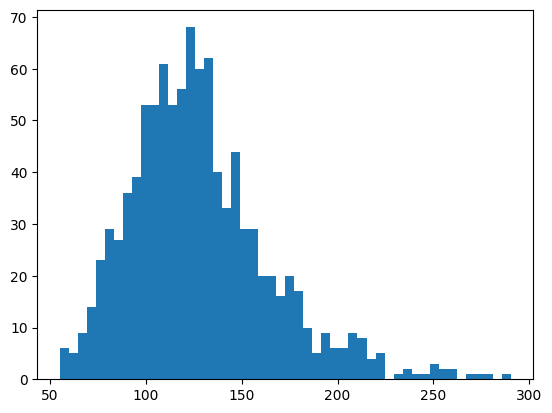

In [132]:
stocks = [gen_yearly(119.21, 1/252, 0.0877, 0.28, 252) for _ in range(1000)]
np.average([stock[-1] for stock in stocks])
plt.hist([stock[-1] for stock in stocks], bins=50)
plt.show()

4) What is the variance of the stock at the end of the year?

In [121]:
print(np.var([stock[-1] for stock in stocks]))
print(np.std([stock[-1] for stock in stocks]))

1545.937129396604
39.31840700481905


5) What is the probability that the price of the stock will dip below 70 at anytime of the year?

In [134]:
def dip_below_70(stock_price):
    return np.min(stock_price) < 70

dip = [dip_below_70(stock) for stock in stocks]
print(np.sum(dip) / len(dip))

0.04


6) What is the proabability that the stock will dip below 100 and come back to 110 within a year? 

In [ ]:
def dip_and_comeback(stock_price):
    dipped = False
    for price in stock_price:
        if price < 100:
            dipped = True
        if dipped and price >= 110:
            return True
    return False

dc = [dip_and_comeback(stock) for stock in stocks]
print(np.sum(dc) / len(dc))


0.272


7) If we buy the stock today at 119.21 dollar and our stragy is that we would sell if the stock fall more than 5 dollar or go up more than 10 dollar.

- 7.1) What is the probability that we get to sell it?

- 7.2) If we get to sell it what's the probability of making profit.

In [147]:
stocks = [gen_yearly(119.21, 1/252, 0.0877, 0.28, 252) for _ in range(1000)]

def dip5_up10(stock_price):
    return np.min(stock_price) < 114.21 and np.max(stock_price) > 129.21

dip = [dip5_up10(stock) for stock in stocks]
print('prob get to sell = ', np.sum(dip) / len(dip))



prob get to sell =  0.621


In [ ]:
stocks = [gen_yearly(119.21, 1/252, 0.0877, 0.28, 252) for _ in range(1000)]


def count_profit(stock_price):
    for price in stock_price:
        if price < 114.21:
            return 'loss'
        if price > 129.21:
            return 'profit'
    return 'hold'

results = [count_profit(path) for path in stocks]
num_profit = results.count('profit')
print('num profit = ', num_profit)
num_loss = results.count('loss')
print('num loss = ', num_loss)
num_hold = results.count('hold')
print('num hold = ', num_hold)
print('prob of profit if sold = ', num_profit / (num_profit + num_loss))
print('prob of loss if sold = ', num_loss / (num_profit + num_loss))
print('expected profit if sold = ', prob_profit*10 - prob_loss*5)


num profit =  363
num loss =  637
num hold =  0
prob of profit if sold =  0.363
prob of loss if sold =  0.637
expected profit if sold =  0.44499999999999984
